## Install Yfinance

In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Download Stock Data

In [26]:
data = yf.download("AAPL", start="2023-01-01")

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_7892\1669918087.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01")
[*********************100%***********************]  1 of 1 completed


In [55]:
data = data.copy()
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

In [56]:
data.head()

,Close,High,Low,Open,Volume,MA_7
Date,,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500,NaN
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600,NaN
2023-01-05,123.161949,125.871079,122.905819,125.240591,80962700,NaN
2023-01-06,127.693565,128.353606,123.033867,124.137225,87754700,NaN
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800,NaN


## Convert Index to DateTime

In [57]:
data.index = pd.to_datetime(data.index)

In [58]:
data.head()

,Close,High,Low,Open,Volume,MA_7
Date,,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500,NaN
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600,NaN
2023-01-05,123.161949,125.871079,122.905819,125.240591,80962700,NaN
2023-01-06,127.693565,128.353606,123.033867,124.137225,87754700,NaN
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800,NaN


# Summary of Data

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2023-01-03 to 2025-11-25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   728 non-null    float64
 1   High    728 non-null    float64
 2   Low     728 non-null    float64
 3   Open    728 non-null    float64
 4   Volume  728 non-null    int64  
 5   MA_7    0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 39.8 KB


In [60]:
data.describe()

,Close,High,Low,Open,Volume,MA_7
count,728.000000,728.000000,728.000000,728.000000,7.280000e+02,0.0
mean,200.287019,202.107874,198.242519,200.027795,5.736623e+07,NaN
std,32.195374,32.508073,31.849297,32.198927,2.445202e+07,NaN
min,123.161949,125.871079,122.324586,124.137225,2.323470e+07,NaN
25%,175.588253,177.192065,173.941006,175.195614,4.422602e+07,NaN
50%,195.163246,196.849364,192.928075,194.295102,5.138430e+07,NaN
75%,225.915974,227.842752,223.565406,225.952730,6.392598e+07,NaN
max,276.970001,280.380005,275.250000,276.721738,3.186799e+08,NaN


# Line Chart of Close

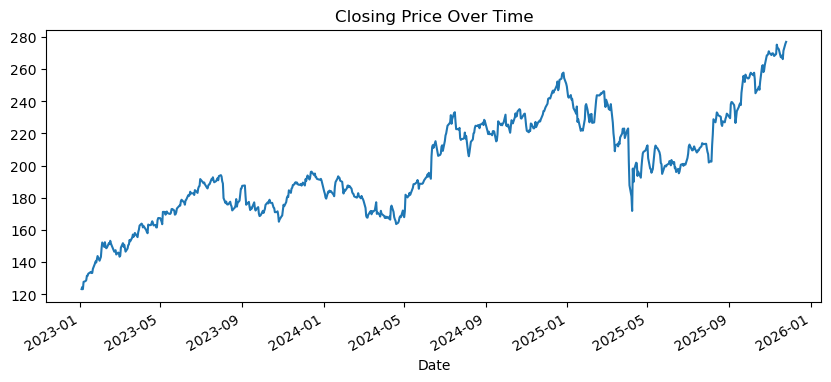

In [61]:
data['Close'].plot(figsize=(10,4))
plt.title("Closing Price Over Time")
plt.show()

# Histograms of numerical columns

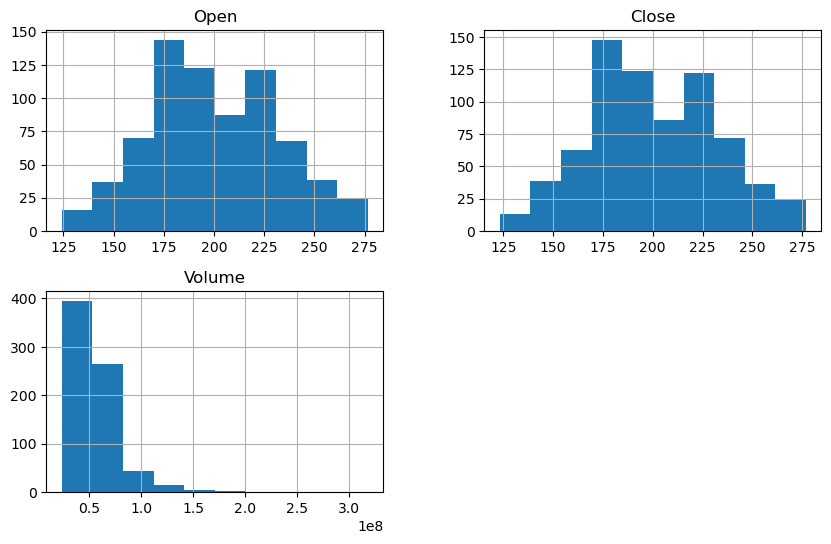

In [62]:
data[['Open','Close','Volume']].hist(figsize=(10,6))
plt.show()

# Moving Average & Trend Analysis
        - A moving average smooths the data and reduces short-term fluctuations
        - it helps to identify trend direction

In [63]:
# Calculate 7-Day Moving Average
data['MA_7'] = data['Close'].rolling(7).mean()

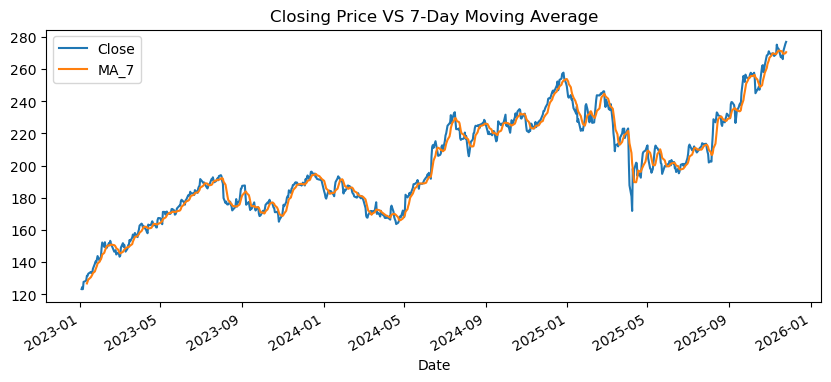

In [64]:
# Plot Close VS Moving Average
data[['Close', 'MA_7']].plot(figsize=(10,4))
plt.title("Closing Price VS 7-Day Moving Average")
plt.show()

# Time Series Decomposition

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

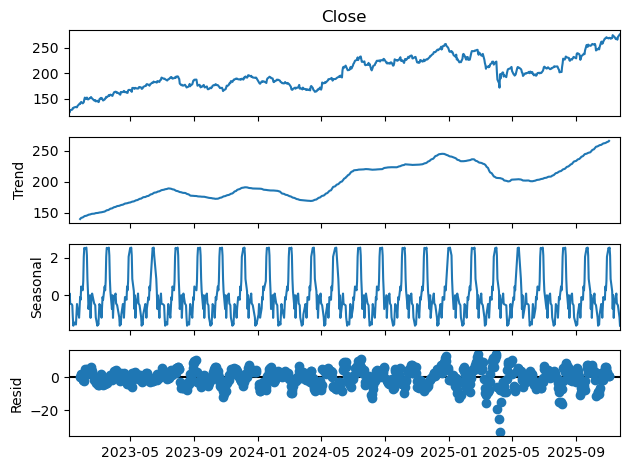

In [65]:
# Decompose the Close series
result = seasonal_decompose(data['Close'], model='additive', period=30)
result.plot()
plt.show()

# Explanation:-
     - Trend: Long-term direction (upward)
     - Seasonality: Repeating patterns (monthly)
     - Residual: Random noise left after removing trend and seasonality

# Stationarity and ARIMA Forecasting
     -> Stationarity Check (ADF Test)
           - Stationarity series has constant mean, variance, trends
           - ARIMA works best when data is stationary

In [37]:
from statsmodels.tsa.stattools import adfuller

In [66]:
# Run ADF test on Volume
result = adfuller(data['Volume'])
print("ADF Statistics: ", result[0])
print("p-value: ", result[1])

ADF Statistics:  -13.452960903515494
p-value:  3.6535441879804334e-25


# Conclusion
    - If p-value < 0.05 → stationary
    - If p-value > 0.05 → non-stationary

# ADF Test Result Interpretation
    The Augmented Dickey-Fuller test was applied to the Volume series.
    The results are:
    ADF Statistic: –13.45
    p-value: 3.65 × 10⁻²⁵
    Since the p-value is far below 0.05, we reject the null hypothesis of non-stationarity.
    Therefore, the Volume series is stationary and does not require differencing before applying ARIMA.

# ARIMA Modeling & Forecasting

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [67]:
# Fit ARIMA(1,0,0) on Close
model = ARIMA(data['Close'], order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Fujitsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  728
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1897.897
Date:                Tue, 25 Nov 2025   AIC                           3801.794
Time:                        20:50:47   BIC                           3815.565
Sample:                             0   HQIC                          3807.108
                                - 728                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.2838     44.061      4.546      0.000     113.926     286.642
ar.L1          0.9984      0.004    285.083      0.000       0.991       1.005
sigma2        10.6786      0.243     43.941      0.0

In [68]:
# Forecast next 30 days
forecast = model_fit.forecast(30)
print(forecast)

728    276.843942
729    276.718090
730    276.592445
731    276.467006
732    276.341774
733    276.216747
734    276.091926
735    275.967310
736    275.842899
737    275.718692
738    275.594690
739    275.470892
740    275.347297
741    275.223905
742    275.100716
743    274.977729
744    274.854945
745    274.732362
746    274.609981
747    274.487802
748    274.365823
749    274.244044
750    274.122466
751    274.001088
752    273.879909
753    273.758929
754    273.638148
755    273.517566
756    273.397182
757    273.276996
Name: predicted_mean, dtype: float64


C:\Users\Fujitsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Fujitsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [70]:
future_dates = pd.date_range(start=data.index[-1], periods=31, freq='D')[1:]

In [71]:
forecast.index = future_dates

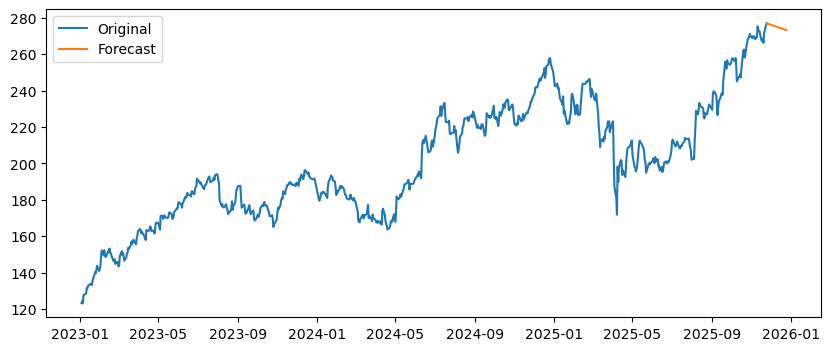

In [73]:
# Plot forecast
plt.figure(figsize=(10,4))
plt.plot(data['Close'], label='Original')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

# Evaluate Mean Absolute Error

In [74]:
from sklearn.metrics import mean_absolute_error

In [75]:
# For MAE, compare last 30 actual values vs model prediction:
actual = data['Close'][-30:]
predicted = model_fit.predict(start=len(data)-30, end=len(data)-1)

In [76]:
mae = mean_absolute_error(actual, predicted)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  2.3613851671214094


# Model Evaluation & Performance Comment
The ARIMA(1,0,0) model produced a Mean Absolute Error (MAE) of 2.36, which indicates that on average the model's predictions differ from the actual closing prices by approximately $2.36.
Considering the stock’s typical price range, this is a reasonably low error, meaning the model provides a decent forecast.
However, ARIMA(1,0,0) is a simple model and may not fully capture long-term trends or seasonality. Despite that, for short-term forecasting, the model performs adequately and does not show signs of overfitting. If higher accuracy is required, more advanced models like ARIMA with differencing or seasonal ARIMA (SARIMA) may be explored.